In [1]:
import numpy as np
import argparse
import cv2
import copy
from pymouse import PyMouse
from math import hypot
from matplotlib import pyplot as plt


m = PyMouse()
cap = cv2.VideoCapture(0)

# define the list of boundaries
boundaries = [
# 	([17, 15, 100], [50, 56, 200]), #RED
	([110, 50, 50], [130, 255, 255]), #BLUE
# 	([25, 146, 190], [62, 174, 250]), #YELLOW
# 	([103, 86, 65], [145, 133, 128]) #GRAY
]
    # loop over the boundaries
[(lower, upper)]= boundaries
        # create NumPy arrays from the boundaries
lower = np.array(lower, dtype = "uint8")
upper = np.array(upper, dtype = "uint8")

boundred = [([0,100, 100], [10, 255, 255])]
[(lowered, uppered)]= boundred
lowered = np.array(lowered, dtype = "uint8")
uppered = np.array(uppered, dtype = "uint8")

kernel = np.ones((15,15), np.uint8)
contours_ = []
contoured_ = []
center = []

while True:
    _, frame = cap.read()

    frame = cv2.flip(frame, 1)
    shot = copy.deepcopy(frame)
        # find the colors within the specified boundaries and apply
        # the mask
    shot = cv2.cvtColor(shot,cv2.COLOR_BGR2HSV) 

    mask = cv2.inRange(shot, lower, upper)
    maskred  = cv2.inRange(shot,lowered, uppered)
#     output = cv2.bitwise_and(frame, frame, mask = mask)

    img_dilation = cv2.dilate(mask, kernel, iterations=1)
    img_dilationred = cv2.dilate(maskred, kernel, iterations=1)
    
    img_erosion = cv2.erode(img_dilation, kernel, iterations=1)
    img_erosionred = cv2.erode(img_dilationred, kernel, iterations=1)
    
    imgray = img_erosion
    imgrayred = img_erosionred
    
    ret,thresh = cv2.threshold(imgray,10,255,0)
    retred, threshred = cv2.threshold(imgrayred,10,255,0)
    
    im2, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    im3, contoured, hierared = cv2.findContours(threshred,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

    for pic,c in enumerate(contours):
        if cv2.contourArea(c) >= 500:
            x,y,w,h = cv2.boundingRect(c)
            bluecenterx = x+int(w/2)
            bluecentery = y+int(h/2)
            frame = cv2.circle(frame, (x+int(w/2),y+int(h/2)),5,(255,0,0),2)
#             m.move(x*3,int(y*2.25))
    
    for pid, d in enumerate(contoured):
        if cv2.contourArea(d) >= 500:
            q,w,e,r = cv2.boundingRect(d)
            redcenterx = q+int(e/2)
            redcentery = w+int(r/2)
            frame = cv2.circle(frame, (q+int(e/2),w+int(r/2)),5,(0,0,255),2)
#             if bluecenterx:
#                 if hypot(bluecenterx-redcenterx,bluecentery-redcentery)<=70:
#                     m.click(x*3,int(y*2.25),1)
            
    # show the images
#     cv2.drawContours(frame, contours_, -1, (0,255,0), 3)
#     frame=cv2.cvtColor(frame, cv2.COLOR_HSV2RGB)
    cv2.imshow("Reds", frame)
    Key= cv2.waitKey(1)
    if Key == 27:
        break


cap.release()
cv2.destroyAllWindows()


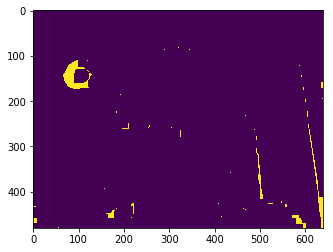

In [16]:
plt.imshow(imgray)